## Stability Demo

The code is written in [Julia](http://julialang.org).

To show you how to develop you own "test problem" to look at stability of numerical methods.

An ODE solution that relaxes to a bounded function.

Let $h(t)$ be a bounded function.  Consider the ODE

\begin{align*}
\begin{cases}
u'(t) = \lambda(u(t) - h(t)) + h'(t),\\
u(0) = \eta.
\end{cases}
\end{align*}

In [ ]:
using Plots, Printf, LaTeXStrings
function Newton(x,g,Dg; tol = 1e-13, nmax = 100)
        for j = 1:nmax
            step = Dg(x)\g(x)
            x -= step
            if maximum(abs.(step)) < tol
                break
            end
            if j == nmax
                println("Newton's method did not terminate")
            end
        end
        x
end

In [ ]:
h = t -> sin(t)^2
dh = t -> 2*sin(t)*cos(t)
f = (u,t) -> λ*(u-h(t))+dh(t)
Df = u -> λ

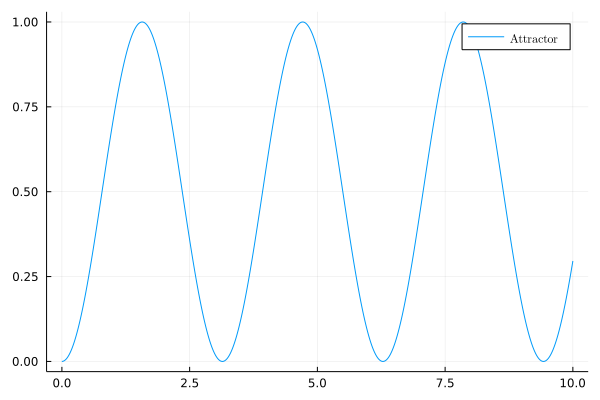

In [23]:
T = 10.# Final time.
t = 0:.01:T
p = plot(t,map(h,t),label=@sprintf("\\mathrm{Attractor}") |> latexstring)

### Forward Euler

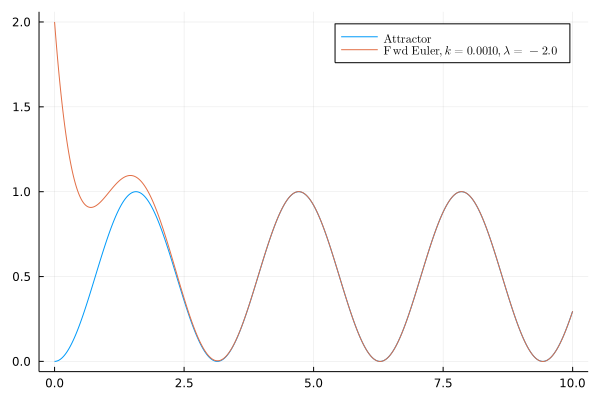

In [24]:
# Forward Euler
λ = -2;
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))# Number of time steps, converted to Int64
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1) # To save times
t[1] = 0.
for i = 2:n+1
    U[i] = U[i-1] + k*f(U[i-1],t[i-1])
    t[i] = t[i-1] + k
end
plot!(t,U,label=@sprintf("\\mathrm{Fwd~Euler}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

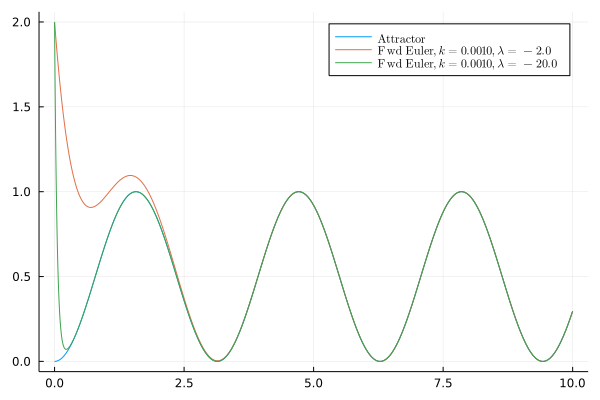

In [25]:
# Forward Euler
λ = -20;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))# Number of time steps, converted to Int64
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1) # To save times
t[1] = 0.
for i = 2:n+1
    U[i] = U[i-1] + k*f(U[i-1],t[i-1])
    t[i] = t[i-1] + k
end
plot!(t,U,label=@sprintf("\\mathrm{Fwd~Euler}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

In [ ]:
savefig(p,"stability_fwd_euler.pdf")

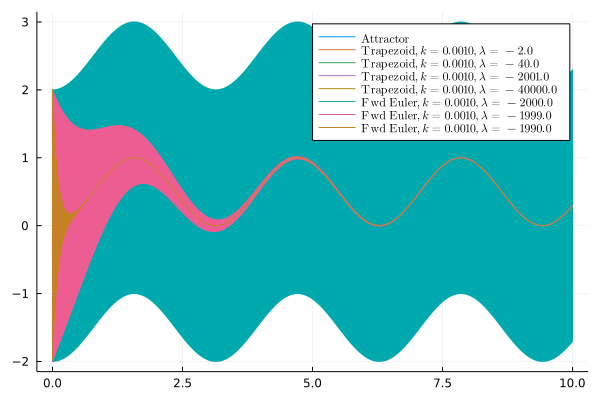

In [37]:
# Forward Euler
λ = -1990;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))# Number of time steps, converted to Int64
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1) # To save times
t[1] = 0.
for i = 2:n+1
    U[i] = U[i-1] + k*f(U[i-1],t[i-1])
    t[i] = t[i-1] + k
end
plot!(t,U,label=@sprintf("\\mathrm{Fwd~Euler}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

In [ ]:
savefig(p,"stability_fwd_euler_blow.pdf")

### Leapfrog (a 2-step method)

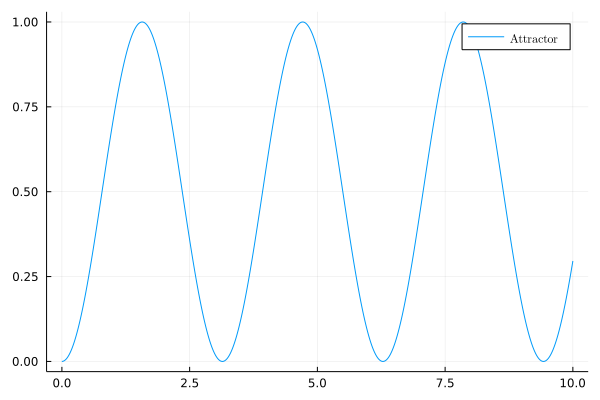

In [27]:
T = 10.# Final time.
t = 0:.01:T
p = plot(t,map(h,t),label=@sprintf("\\mathrm{Attractor}") |> latexstring)

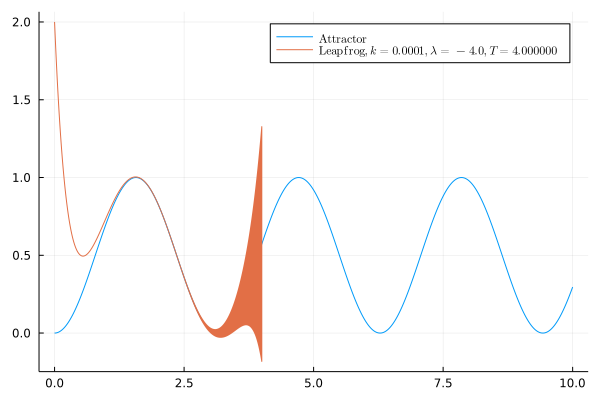

In [28]:
λ = -4.;
T = 4.# Final time.
k = 0.0001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))# Number of time steps, converted to Int64
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1)
t[1] = 0.
U[2] = U[1] + k*f(U[1],t[1])  # Begin the method using
t[2] = t[1] + k                # forward Euler
for i = 3:n+1
    U[i] = U[i-2] + (2*k)*f(U[i-1],t[i-1]) #Leapfrog
    t[i] = t[i-1] + k
end
plot!(t,U,label=@sprintf("\\mathrm{Leapfrog}, k = %0.4f, \\lambda = %3.1f, T = %f",k,λ,T) |> latexstring)

In [ ]:
savefig(p,"stability_leapfrog.pdf")

## Trapezoid

At each time step we seek $U^{n+1}$ which solves

$$U^{n+1} - U^{n} = \frac{k}{2} \left( f(U^{n+1},t_{n+1}) + f(U^{n},t_n) \right).$$

So, we look for a zero of

$$ g(u,U^{n},t,t_n) = u - U^{n} - \frac{k}{2} \left( f(u,t) + f(U^{n},t_n) \right).$$

The Jacobian is given by

$$ D_u g(u) = I - \frac{k}{2} D_uf(u,t). $$

In [29]:
g = (u,Un,t,tn) -> u - Un - (k/2)*(f(u,t)+f(Un,tn))
Dg = u -> 1 - (k/2)*Df(u)

#25 (generic function with 1 method)

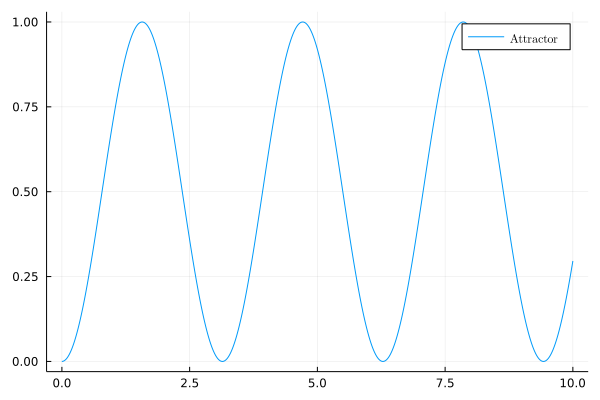

In [30]:
T = 10.# Final time.
t = 0:.01:T
p = plot(t,map(h,t),label=@sprintf("\\mathrm{Attractor}") |> latexstring)

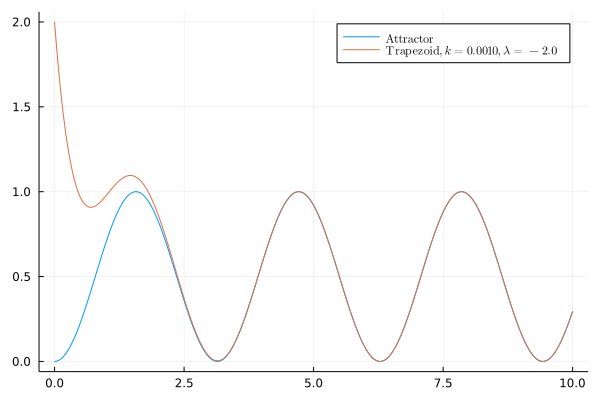

In [31]:
λ = -2.;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1)
t[1] = 0.
max_iter = 10
for i = 2:n+1
    t[i] = t[i-1] + k
    U[i] = Newton(U[i-1],u -> g(u,U[i-1],t[i],t[i-1]), Dg; tol = k^3/10) 
end
plot!(t,U,label=@sprintf("\\mathrm{Trapezoid}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

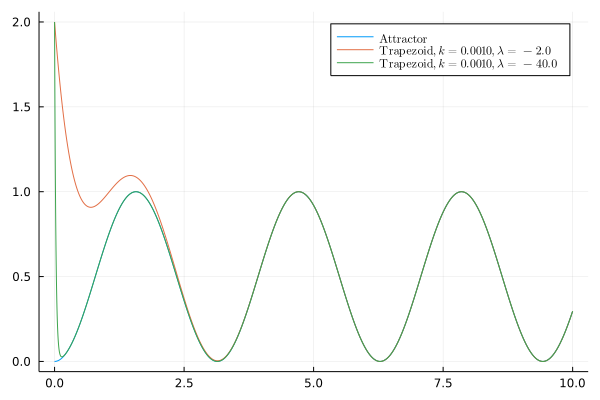

In [32]:
λ = -40.;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1)
t[1] = 0.
max_iter = 10
for i = 2:n+1
    t[i] = t[i-1] + k
    U[i] = Newton(U[i-1],u -> g(u,U[i-1],t[i],t[i-1]), Dg; tol = k^3/10) 
end
plot!(t,U,label=@sprintf("\\mathrm{Trapezoid}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

In [ ]:
savefig(p,"stability_trap_1.pdf")

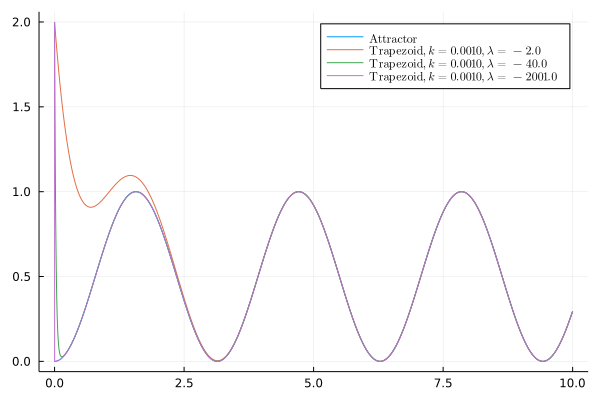

In [33]:
λ = -2001.;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1)
t[1] = 0.
max_iter = 10
for i = 2:n+1
    t[i] = t[i-1] + k
    U[i] = Newton(U[i-1],u -> g(u,U[i-1],t[i],t[i-1]), Dg; tol = k^3/10) 
end
plot!(t,U,label=@sprintf("\\mathrm{Trapezoid}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

In [ ]:
savefig(p,"stability_trap_2.pdf")

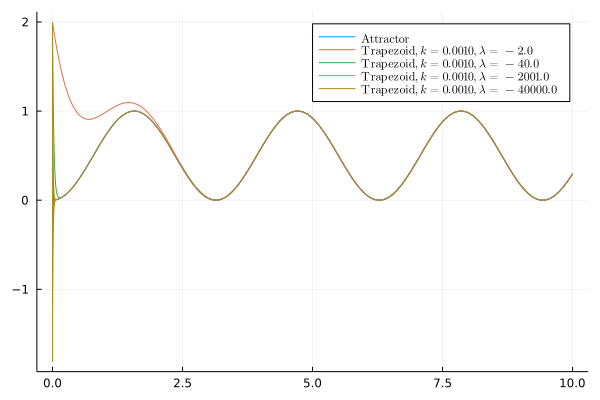

In [34]:
λ = -40000.;
T = 10.# Final time.
k = 0.001 # Step size
u₀ = 2.
n = convert(Int64,ceil(T/k))
U = zeros(n+1) # To save the solution values
U[1] = u₀
t = zeros(n+1)
t[1] = 0.
max_iter = 10
for i = 2:n+1
    t[i] = t[i-1] + k
    U[i] = Newton(U[i-1],u -> g(u,U[i-1],t[i],t[i-1]), Dg; tol = k^3/10) 
end
plot!(t,U,label=@sprintf("\\mathrm{Trapezoid}, k = %0.4f, \\lambda = %3.1f",k,λ) |> latexstring)

In [ ]:
savefig(p,"stability_trap_3.pdf")